In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

pd.set_option('display.max_columns', None)

### Controllers velocity dataset of the simulation
The controller velocity files contains the datasets of the local and odometry data (Z position, linear speeds X and Y and yaw rate) of the controller, where the local data is controllerVelocityLocal.csv and the odometry data is controllerVelocityOdom.csv. Three controllers were tested (P Proportional, PD Proportinal-Derivative, PID Proportinal-Integral-Derivative), five times each, to determine which of them have a better performance.

In the datasets each controller was tested five times, both datasets must have five columns per test (timestamp, Z position, X velocity, Y velocity and yaw rate), each test is named as its controller and numerate from 1 to 5, for example *P1_pos_Z* makes reference to the Z position of first test of the controller P.

In [2]:
local_file = "./data/controllerVelocityLocal_2.csv"
local_data = pd.read_csv(local_file)

odom_file = "./data/controllerVelocityOdom_2.csv"
odom_data = pd.read_csv(odom_file)

In [3]:
local_data

,P1_time_percent,P1_pos_Z,P1_vel_X,P1_vel_Y,P1_yaw_rate,P2_time_percent,P2_pos_Z,P2_vel_X,P2_vel_Y,P2_yaw_rate,P3_time_percent,P3_pos_Z,P3_vel_X,P3_vel_Y,P3_yaw_rate,P4_time_percent,P4_pos_Z,P4_vel_X,P4_vel_Y,P4_yaw_rate,P5_time_percent,P5_pos_Z,P5_vel_X,P5_vel_Y,P5_yaw_rate,PD1_time_percent,PD1_pos_Z,PD1_vel_X,PD1_vel_Y,PD1_yaw_rate,PD2_time_percent,PD2_pos_Z,PD2_vel_X,PD2_vel_Y,PD2_yaw_rate,PD3_time_percent,PD3_pos_Z,PD3_vel_X,PD3_vel_Y,PD3_yaw_rate,PD4_time_percent,PD4_pos_Z,PD4_vel_X,PD4_vel_Y,PD4_yaw_rate,PD5_time_percent,PD5_pos_Z,PD5_vel_X,PD5_vel_Y,PD5_yaw_rate,PID1_time_percent,PID1_pos_Z,PID1_vel_X,PID1_vel_Y,PID1_yaw_rate,PID2_time_percent,PID2_pos_Z,PID2_vel_X,PID2_vel_Y,PID2_yaw_rate,PID3_time_percent,PID3_pos_Z,PID3_vel_X,PID3_vel_Y,PID3_yaw_rate,PID4_time_percent,PID4_pos_Z,PID4_vel_X,PID4_vel_Y,PID4_yaw_rate,PID5_time_percent,PID5_pos_Z,PID5_vel_X,PID5_vel_Y,PID5_yaw_rate
0,2.839785e+12,3.400000,-0.334499,0.364091,0.147960,2.791697e+12,3.5,-0.367179,0.338123,0.155662,2880469000000,3.500000,-0.368392,0.326828,0.134077,2.802321e+12,3.450,-0.308713,0.313951,0.103795,2.787377e+12,3.5,-0.337689,0.339775,0.150885,2.857189e+12,3.400000,-0.708195,0.714968,0.128122,2.880285e+12,3.475,-0.733789,0.711334,0.151007,2.821049e+12,3.475,-0.730567,0.687596,0.131475,2.810653e+12,3.475,-0.663846,0.625589,0.154992,2.799969e+12,3.450000,-0.692811,0.597058,0.146263,2.789485e+12,3.425,-0.75,0.75,0.146352,2.801409e+12,3.425,-0.721001,0.647310,0.154825,2.844341e+12,3.425000,-0.75,0.644274,0.142372,2.782809e+12,3.450,-0.75,0.716920,0.173809,2.846573e+12,3.45,-0.750000,0.750000,0.090968
1,2.839893e+12,3.375000,-0.334689,0.364092,0.148170,2.791809e+12,3.5,-0.388658,0.377125,0.154742,2880553000000,3.500000,-0.368463,0.327979,0.133662,2.802421e+12,3.450,-0.311800,0.323950,0.112243,2.787473e+12,3.5,-0.337170,0.339267,0.151461,2.857541e+12,3.375000,-0.705135,0.715307,0.128689,2.880377e+12,3.450,-0.734624,0.711028,0.151176,2.821129e+12,3.450,-0.731404,0.687561,0.131607,2.810777e+12,3.450,-0.663945,0.625721,0.155176,2.800061e+12,3.425000,-0.692009,0.597306,0.146192,2.789577e+12,3.425,-0.75,0.75,0.146231,2.801497e+12,3.425,-0.750000,0.707626,0.154908,2.844433e+12,3.400000,-0.75,0.653015,0.142159,2.782929e+12,3.425,-0.75,0.719617,0.176614,2.846649e+12,3.45,-0.750000,0.750000,0.089136
2,2.839981e+12,3.349999,-0.312593,0.355081,0.142037,2.791921e+12,3.5,-0.358356,0.347322,0.143792,2880661000000,3.500000,-0.368534,0.329130,0.133247,2.802525e+12,3.450,-0.311561,0.324951,0.110884,2.787573e+12,3.5,-0.320597,0.359356,0.159297,2.858057e+12,3.349999,-0.702074,0.715645,0.129255,2.880473e+12,3.425,-0.736044,0.711325,0.151421,2.821273e+12,3.425,-0.750000,0.750000,0.130460,2.810853e+12,3.425,-0.664574,0.626385,0.155437,2.800165e+12,3.400000,-0.691207,0.597562,0.146120,2.789661e+12,3.425,-0.75,0.75,0.146109,2.801497e+12,3.425,-0.750000,0.731919,0.157573,2.844525e+12,3.375000,-0.75,0.659659,0.147718,2.783045e+12,3.400,-0.75,0.722316,0.179420,2.846757e+12,3.45,-0.750000,0.714895,0.098481
3,2.840061e+12,3.324999,-0.310920,0.354328,0.141932,2.791921e+12,3.5,-0.343672,0.338213,0.141958,2880781000000,3.500000,-0.423453,0.408959,0.057598,2.802625e+12,3.425,-0.361302,0.395375,0.116952,2.787649e+12,3.5,-0.318795,0.360496,0.160267,2.858293e+12,3.324999,-0.699014,0.715983,0.129821,2.880589e+12,3.400,-0.737464,0.711623,0.151666,2.821373e+12,3.400,-0.750000,0.750000,0.130594,2.810981e+12,3.400,-0.665203,0.627048,0.155698,2.800249e+12,3.375000,-0.690405,0.597817,0.146047,2.789749e+12,3.425,-0.75,0.75,0.145207,2.801593e+12,3.425,-0.686675,0.654827,0.157114,2.844625e+12,3.349999,-0.75,0.668822,0.147811,2.783153e+12,3.375,-0.75,0.725017,0.182227,2.847021e+12,3.45,-0.750000,0.724366,0.097238
4,2.840241e+12,3.299999,-0.309247,0.353575,0.141827,2.792029e+12,3.5,-0.343021,0.339008,0.141431,2880881000000,3.500000,-0.447666,0.444811,0.001677,2.802733e+12,3.400,-0.365303,0.402265,0.115998,2.787781e+12,3.5,-0.316993,0.361635,0.161238,2.858461e+12,3.299999,-0.695954,0.716322,0.130387,2

In [4]:
odom_data

,P1_time_percent,P1_pos_Z,P1_vel_X,P1_vel_Y,P1_yaw_rate,P2_time_percent,P2_pos_Z,P2_vel_X,P2_vel_Y,P2_yaw_rate,P3_time_percent,P3_pos_Z,P3_vel_X,P3_vel_Y,P3_yaw_rate,P4_time_percent,P4_pos_Z,P4_vel_X,P4_vel_Y,P4_yaw_rate,P5_time_percent,P5_pos_Z,P5_vel_X,P5_vel_Y,P5_yaw_rate,PD1_time_percent,PD1_pos_Z,PD1_vel_X,PD1_vel_Y,PD1_yaw_rate,PD2_time_percent,PD2_pos_Z,PD2_vel_X,PD2_vel_Y,PD2_yaw_rate,PD3_time_percent,PD3_pos_Z,PD3_vel_X,PD3_vel_Y,PD3_yaw_rate,PD4_time_percent,PD4_pos_Z,PD4_vel_X,PD4_vel_Y,PD4_yaw_rate,PD5_time_percent,PD5_pos_Z,PD5_vel_X,PD5_vel_Y,PD5_yaw_rate,PID1_time_percent,PID1_pos_Z,PID1_vel_X,PID1_vel_Y,PID1_yaw_rate,PID2_time_percent,PID2_pos_Z,PID2_vel_X,PID2_vel_Y,PID2_yaw_rate,PID3_time_percent,PID3_pos_Z,PID3_vel_X,PID3_vel_Y,PID3_yaw_rate,PID4_time_percent,PID4_pos_Z,PID4_vel_X,PID4_vel_Y,PID4_yaw_rate,PID5_time_percent,PID5_pos_Z,PID5_vel_X,PID5_vel_Y,PID5_yaw_rate
0,2.839709e+12,3.546532,0.087533,0.057130,0.057130,2.791689e+12,3.611732,0.038131,0.083676,0.173657,2880457000000,3.532215,-0.036088,0.064345,-0.011976,2.802245e+12,3.651750,0.055016,0.069867,0.036286,2.787369e+12,3.557235,0.077147,0.070669,0.129188,2.857189e+12,3.480363,0.048953,-0.048550,0.218953,2.880261e+12,3.505886,0.021686,-0.019650,0.001515,2.820825e+12,3.581409,0.030815,0.043243,0.000606,2.810625e+12,3.621951,-0.007947,-0.037535,0.001709,2.799613e+12,3.626810,-0.049508,0.009978,0.004117,2.789473e+12,3.545837,0.093959,0.134657,0.061215,2.801369e+12,3.631645,0.070717,0.099086,0.148718,2.844253e+12,3.601581,-0.002203,0.199507,0.124067,2.782801e+12,3.529986,0.087340,0.119739,0.298008,2.846545e+12,3.595464,0.116679,0.231604,0.135301
1,2.839741e+12,3.550179,0.085134,0.030189,0.030189,2.791721e+12,3.614910,0.058414,0.122043,0.173271,2880493000000,3.531711,-0.038259,0.068826,-0.015078,2.802281e+12,3.651188,0.051691,0.073032,0.026277,2.787401e+12,3.560983,0.082738,0.086755,0.148743,2.857233e+12,3.481990,0.080363,-0.011450,0.240146,2.880297e+12,3.505620,0.021548,-0.018264,-0.000128,2.820861e+12,3.580386,0.030818,0.044279,0.001736,2.810657e+12,3.622511,-0.007999,-0.035052,0.001702,2.799645e+12,3.627774,-0.048985,0.010088,0.000253,2.789505e+12,3.546223,0.088728,0.116084,0.051814,2.801401e+12,3.632230,0.077031,0.119726,0.095245,2.844281e+12,3.603301,0.036199,0.247994,0.122142,2.782833e+12,3.533722,0.150728,0.190218,0.312324,2.846581e+12,3.595272,0.123303,0.225281,0.147485
2,2.839781e+12,3.552724,0.096274,0.075065,0.075065,2.791757e+12,3.618310,0.092093,0.152777,0.176450,2880525000000,3.531423,-0.041668,0.059248,-0.007646,2.802313e+12,3.651789,0.035862,0.036692,0.035774,2.787433e+12,3.565528,0.109599,0.137096,0.142784,2.857253e+12,3.482758,0.134124,0.054084,0.291484,2.880329e+12,3.505354,0.022597,-0.017506,0.002334,2.820893e+12,3.579629,0.029433,0.043580,0.000802,2.810693e+12,3.622569,-0.008667,-0.033862,0.001761,2.799677e+12,3.628173,-0.047905,0.009907,-0.000183,2.789537e+12,3.546161,0.069606,0.109920,0.011820,2.801433e+12,3.631538,0.076590,0.105482,0.057262,2.844305e+12,3.605116,0.029093,0.224915,0.119503,2.782869e+12,3.536465,0.194273,0.249330,0.325879,2.846613e+12,3.597123,0.153186,0.274884,0.126009
3,2.839813e+12,3.554897,0.109877,0.070098,0.070098,2.791789e+12,3.620390,0.093058,0.123126,0.125414,2880553000000,3.531541,-0.054297,0.040357,0.011638,2.802341e+12,3.651682,0.034154,0.046542,0.072198,2.787469e+12,3.569589,0.120279,0.108964,0.123836,2.857293e+12,3.482182,0.194242,0.090688,0.254281,2.880361e+12,3.505220,0.010496,-0.032915,0.012309,2.820925e+12,3.579027,0.028695,0.043597,0.002557,2.810725e+12,3.623113,-0.018007,-0.049665,0.013884,2.799713e+12,3.628148,-0.046783,0.010503,0.004965,2.789573e+12,3.547048,0.036684,0.064710,0.055237,2.801465e+12,3.631145,0.057434,0.070668,0.052970,2.844349e+12,3.607977,0.036114,0.229495,0.154805,2.782901e+12,3.538720,0.198186,0.258824,0.346104,2.846645e+12,3.599672,0.149193,0.250531,0.112623
4,2.839845e+12,3.557152,0.107735,0.046338,0.046338,2.791821e+12,3.621241,0.081238,0.138705,0.097320,2880593000000,3.532

The _controller_times_ dictionary contains the duration time of the simulation for each landing process. The time of the tests must be saved with the name of the test (as described above) in the _controllerTestTime.csv_ file n the columns _test_ and _duration_time_.

In [5]:
controller_times = {}

with open("./data/controllerTestTime_2.csv", "r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    next(csv_reader)
    for row in csv_reader:
        controller_times[row[0]] = float(row[1])

print(controller_times)

{'P1': 42.22, 'P2': 46.97, 'P3': 73.98, 'P4': 52.94, 'P5': 56.34, 'PD1': 35.33, 'PD2': 35.98, 'PD3': 18.72, 'PD4': 30.5, 'PD5': 19.46, 'PID1': 29.04, 'PID2': 58.41, 'PID3': 51.92, 'PID4': 42.9, 'PID5': 52.57}


Calculate the time for each sample given the total time of each test and the timestamp of the simulation (time_percent in the dataset), knowing that the relationship between the duration time of the test and the timestamp is linear. It important to notice that the starting point of the duration time of the test is zero.

$\displaystyle m = \frac{time_{total}}{timestamp_n-timestamp_0}$ where $timestamp_0$ is the first value of the timestamps, $timestamp_n$ is the last value of the timestamps and $total time$ is the duration of the test.

$\displaystyle b = m.timestamp_n + time_{total}$

The linear relantionship between the timestamp ant the duration time of the tests is :
$\displaystyle time = m.timestamp + b$

Time calculation fot the local data.

In [6]:
for test, test_time in controller_times.items():    

    first_val_tstamp = local_data[test+"_time_percent"][0]
    last_val_tstamp = local_data[test+"_time_percent"][local_data.apply(lambda column: column.dropna().index[-1])[test+"_time_percent"]]
    
    m = test_time / (last_val_tstamp - first_val_tstamp)
    b = test_time - m * last_val_tstamp
    
    local_data[test+"_time"] = m * local_data[test+"_time_percent"] + b
    
#    last_time = data[test+"_time"][data.apply(lambda column: column.dropna().index[-1])[test+"_time"]]
#    print(test, test_time, last_time)

local_data = local_data.reindex(columns=sorted(local_data.columns))

Time calculation for the odometry data.

In [7]:
for test, test_time in controller_times.items():    

    first_val_tstamp = odom_data[test+"_time_percent"][0]
    last_val_tstamp = odom_data[test+"_time_percent"][odom_data.apply(lambda column: column.dropna().index[-1])[test+"_time_percent"]]
    
    m = test_time / (last_val_tstamp - first_val_tstamp)
    b = test_time - m * last_val_tstamp
    
    odom_data[test+"_time"] = m * odom_data[test+"_time_percent"] + b
    
#    last_time = data[test+"_time"][data.apply(lambda column: column.dropna().index[-1])[test+"_time"]]
#    print(test, test_time, last_time)

odom_data = odom_data.reindex(columns=sorted(odom_data.columns))

Delete the timestamp columns, as they won't be needed anymore.

In [8]:
local_droplist = [i for i in local_data.columns if 'time_percent' in i]
local_data.drop(local_droplist, axis=1, inplace=True)

odom_droplist = [i for i in odom_data.columns if 'time_percent' in i]
odom_data.drop(odom_droplist, axis=1, inplace=True)

In [9]:
local_data

,P1_pos_Z,P1_time,P1_vel_X,P1_vel_Y,P1_yaw_rate,P2_pos_Z,P2_time,P2_vel_X,P2_vel_Y,P2_yaw_rate,P3_pos_Z,P3_time,P3_vel_X,P3_vel_Y,P3_yaw_rate,P4_pos_Z,P4_time,P4_vel_X,P4_vel_Y,P4_yaw_rate,P5_pos_Z,P5_time,P5_vel_X,P5_vel_Y,P5_yaw_rate,PD1_pos_Z,PD1_time,PD1_vel_X,PD1_vel_Y,PD1_yaw_rate,PD2_pos_Z,PD2_time,PD2_vel_X,PD2_vel_Y,PD2_yaw_rate,PD3_pos_Z,PD3_time,PD3_vel_X,PD3_vel_Y,PD3_yaw_rate,PD4_pos_Z,PD4_time,PD4_vel_X,PD4_vel_Y,PD4_yaw_rate,PD5_pos_Z,PD5_time,PD5_vel_X,PD5_vel_Y,PD5_yaw_rate,PID1_pos_Z,PID1_time,PID1_vel_X,PID1_vel_Y,PID1_yaw_rate,PID2_pos_Z,PID2_time,PID2_vel_X,PID2_vel_Y,PID2_yaw_rate,PID3_pos_Z,PID3_time,PID3_vel_X,PID3_vel_Y,PID3_yaw_rate,PID4_pos_Z,PID4_time,PID4_vel_X,PID4_vel_Y,PID4_yaw_rate,PID5_pos_Z,PID5_time,PID5_vel_X,PID5_vel_Y,PID5_yaw_rate
0,3.400000,0.000000,-0.334499,0.364091,0.147960,3.5,0.000000,-0.367179,0.338123,0.155662,3.500000,0.000000,-0.368392,0.326828,0.134077,3.450,4.547474e-13,-0.308713,0.313951,0.103795,3.5,0.000000,-0.337689,0.339775,0.150885,3.400000,0.000000,-0.708195,0.714968,0.128122,3.475,0.000000,-0.733789,0.711334,0.151007,3.475,-4.547474e-13,-0.730567,0.687596,0.131475,3.475,0.000000,-0.663846,0.625589,0.154992,3.450000,0.000000,-0.692811,0.597058,0.146263,3.425,0.000000,-0.75,0.75,0.146352,3.425,0.000000,-0.721001,0.647310,0.154825,3.425000,0.000000,-0.75,0.644274,0.142372,3.450,0.000000,-0.75,0.716920,0.173809,3.45,0.000000,-0.750000,0.750000,0.090968
1,3.375000,0.113134,-0.334689,0.364092,0.148170,3.5,0.117153,-0.388658,0.377125,0.154742,3.500000,0.086123,-0.368463,0.327979,0.133662,3.450,1.034065e-01,-0.311800,0.323950,0.112243,3.5,0.099482,-0.337170,0.339267,0.151461,3.375000,0.371184,-0.705135,0.715307,0.128689,3.450,0.096879,-0.734624,0.711028,0.151176,3.450,9.707026e-02,-0.731404,0.687561,0.131607,3.450,0.132665,-0.663945,0.625721,0.155176,3.425000,0.112260,-0.692009,0.597306,0.146192,3.425,0.103090,-0.75,0.75,0.146231,3.425,0.090107,-0.750000,0.707626,0.154908,3.400000,0.095069,-0.75,0.653015,0.142159,3.425,0.127641,-0.75,0.719617,0.176614,3.45,0.078346,-0.750000,0.750000,0.089136
2,3.349999,0.205318,-0.312593,0.355081,0.142037,3.5,0.234306,-0.358356,0.347322,0.143792,3.500000,0.196853,-0.368534,0.329130,0.133247,3.450,2.109493e-01,-0.311561,0.324951,0.110884,3.5,0.203109,-0.320597,0.359356,0.159297,3.349999,0.915307,-0.702074,0.715645,0.129255,3.425,0.197970,-0.736044,0.711325,0.151421,3.425,2.717967e-01,-0.750000,0.750000,0.130460,3.425,0.213975,-0.664574,0.626385,0.155437,3.400000,0.239162,-0.691207,0.597562,0.146120,3.425,0.197216,-0.75,0.75,0.146109,3.425,0.090107,-0.750000,0.731919,0.157573,3.375000,0.190138,-0.75,0.659659,0.147718,3.400,0.251026,-0.75,0.722316,0.179420,3.45,0.189679,-0.750000,0.714895,0.098481
3,3.324999,0.289121,-0.310920,0.354328,0.141932,3.5,0.234306,-0.343672,0.338213,0.141958,3.500000,0.319887,-0.423453,0.408959,0.057598,3.425,3.143558e-01,-0.361302,0.395375,0.116952,3.5,0.281866,-0.318795,0.360496,0.160267,3.324999,1.164169,-0.699014,0.715983,0.129821,3.400,0.320122,-0.737464,0.711623,0.151666,3.400,3.931346e-01,-0.750000,0.750000,0.130594,3.400,0.350919,-0.665203,0.627048,0.155698,3.375000,0.341660,-0.690405,0.597817,0.146047,3.425,0.295823,-0.75,0.75,0.145207,3.425,0.188406,-0.686675,0.654827,0.157114,3.349999,0.293473,-0.75,0.668822,0.147811,3.375,0.365903,-0.75,0.725017,0.182227,3.45,0.461828,-0.750000,0.724366,0.097238
4,3.299999,0.477678,-0.309247,0.353575,0.141827,3.5,0.347275,-0.343021,0.339008,0.141431,3.500000,0.422415,-0.447666,0.444811,0.001677,3.400,4.260348e-01,-0.365303,0.402265,0.115998,3.5,0.418654,-0.316993,0.361635,0.161238,3.299999,1.341325,-0.695954,0.716322,0.130387,3.375,0.438061,-0.738884,0.711921,0.151911,3.375,5.144724e-01,-0.750000,0.750000,0.130728,3.375,0.483584,-0.665832,0.627712,0.155959,3.349999,0.444159,-0.689603,0.598073,0.145975,3.425,0.407878,-0.75,0.75,0.145048,3.425,0.188406,-0.652151,0.623555,0.164599,3.324999,0.400943,-0.75,0.677974,0.147932,3.375,0.476525,-0.75,0.750000,0.163750,3.45,0.573161,-

In [10]:
odom_data

,P1_pos_Z,P1_time,P1_vel_X,P1_vel_Y,P1_yaw_rate,P2_pos_Z,P2_time,P2_vel_X,P2_vel_Y,P2_yaw_rate,P3_pos_Z,P3_time,P3_vel_X,P3_vel_Y,P3_yaw_rate,P4_pos_Z,P4_time,P4_vel_X,P4_vel_Y,P4_yaw_rate,P5_pos_Z,P5_time,P5_vel_X,P5_vel_Y,P5_yaw_rate,PD1_pos_Z,PD1_time,PD1_vel_X,PD1_vel_Y,PD1_yaw_rate,PD2_pos_Z,PD2_time,PD2_vel_X,PD2_vel_Y,PD2_yaw_rate,PD3_pos_Z,PD3_time,PD3_vel_X,PD3_vel_Y,PD3_yaw_rate,PD4_pos_Z,PD4_time,PD4_vel_X,PD4_vel_Y,PD4_yaw_rate,PD5_pos_Z,PD5_time,PD5_vel_X,PD5_vel_Y,PD5_yaw_rate,PID1_pos_Z,PID1_time,PID1_vel_X,PID1_vel_Y,PID1_yaw_rate,PID2_pos_Z,PID2_time,PID2_vel_X,PID2_vel_Y,PID2_yaw_rate,PID3_pos_Z,PID3_time,PID3_vel_X,PID3_vel_Y,PID3_yaw_rate,PID4_pos_Z,PID4_time,PID4_vel_X,PID4_vel_Y,PID4_yaw_rate,PID5_pos_Z,PID5_time,PID5_vel_X,PID5_vel_Y,PID5_yaw_rate
0,3.546532,-4.547474e-13,0.087533,0.057130,0.057130,3.611732,0.000000,0.038131,0.083676,0.173657,3.532215,0.000000,-0.036088,0.064345,-0.011976,3.651750,0.000000,0.055016,0.069867,0.036286,3.557235,0.000,0.077147,0.070669,0.129188,3.480363,0.000000,0.048953,-0.048550,0.218953,3.505886,0.000000,0.021686,-0.019650,0.001515,3.581409,0.000000,0.030815,0.043243,0.000606,3.621951,0.000000,-0.007947,-0.037535,0.001709,3.626810,0.000000,-0.049508,0.009978,0.004117,3.545837,0.000000,0.093959,0.134657,0.061215,3.631645,-4.547474e-13,0.070717,0.099086,0.148718,3.601581,0.000000,-0.002203,0.199507,0.124067,3.529986,4.547474e-13,0.087340,0.119739,0.298008,3.595464,4.547474e-13,0.116679,0.231604,0.135301
1,3.550179,3.199697e-02,0.085134,0.030189,0.030189,3.614910,0.032001,0.058414,0.122043,0.173271,3.531711,0.036004,-0.038259,0.068826,-0.015078,3.651188,0.036003,0.051691,0.073032,0.026277,3.560983,0.032,0.082738,0.086755,0.148743,3.481990,0.043998,0.080363,-0.011450,0.240146,3.505620,0.036004,0.021548,-0.018264,-0.000128,3.580386,0.035992,0.030818,0.044279,0.001736,3.622511,0.032004,-0.007999,-0.035052,0.001702,3.627774,0.031993,-0.048985,0.010088,0.000253,3.546223,0.031996,0.088728,0.116084,0.051814,3.632230,3.199890e-02,0.077031,0.119726,0.095245,3.603301,0.027998,0.036199,0.247994,0.122142,3.533722,3.200000e-02,0.150728,0.190218,0.312324,3.595272,3.600137e-02,0.123303,0.225281,0.147485
2,3.552724,7.199318e-02,0.096274,0.075065,0.075065,3.618310,0.068003,0.092093,0.152777,0.176450,3.531423,0.068007,-0.041668,0.059248,-0.007646,3.651789,0.068005,0.035862,0.036692,0.035774,3.565528,0.064,0.109599,0.137096,0.142784,3.482758,0.063996,0.134124,0.054084,0.291484,3.505354,0.068008,0.022597,-0.017506,0.002334,3.579629,0.067985,0.029433,0.043580,0.000802,3.622569,0.068009,-0.008667,-0.033862,0.001761,3.628173,0.063987,-0.047905,0.009907,-0.000183,3.546161,0.063991,0.069606,0.109920,0.011820,3.631538,6.399781e-02,0.076590,0.105482,0.057262,3.605116,0.051996,0.029093,0.224915,0.119503,3.536465,6.800000e-02,0.194273,0.249330,0.325879,3.597123,6.800259e-02,0.153186,0.274884,0.126009
3,3.554897,1.039901e-01,0.109877,0.070098,0.070098,3.620390,0.100004,0.093058,0.123126,0.125414,3.531541,0.096010,-0.054297,0.040357,0.011638,3.651682,0.096007,0.034154,0.046542,0.072198,3.569589,0.100,0.120279,0.108964,0.123836,3.482182,0.103994,0.194242,0.090688,0.254281,3.505220,0.100011,0.010496,-0.032915,0.012309,3.579027,0.099979,0.028695,0.043597,0.002557,3.623113,0.100013,-0.018007,-0.049665,0.013884,3.628148,0.099979,-0.046783,0.010503,0.004965,3.547048,0.099986,0.036684,0.064710,0.055237,3.631145,9.599671e-02,0.057434,0.070668,0.052970,3.607977,0.095993,0.036114,0.229495,0.154805,3.538720,1.000000e-01,0.198186,0.258824,0.346104,3.599672,1.000038e-01,0.149193,0.250531,0.112623
4,3.557152,1.359871e-01,0.107735,0.046338,0.046338,3.621241,0.132006,0.081238,0.138705,0.097320,3.532696,0.136015,-0.044855,0.065782,0.085642,3.650605,0.136010,0.052707,0.078184,0.086884,3.572737,0.132,0.112847,0.100703,0.069196,3.479991,0.135992,0.259859,0.157647,0.232072,3.506691,0.136015,-0.006954,-0.047111,0.103641,3.577990,0.135971,0.028545,0.044283,-0.003318,3.625125,0.132017,-0.013793,-0.037935,0.077766,3.628206,0.1319

### Reorganize local and odom datasets to plot their results

Reorganize the local data to plot the results for each controller.

In [11]:
local_ctrl = pd.DataFrame(columns=["Time", "Controller", "Z_Position", "X_Velocity", "Y_Velocity", "Yaw_Rate"])

for test in controller_times:
    control = pd.DataFrame(columns=["Time", "Controller", "Z_Position", "X_Velocity", "Y_Velocity", "Yaw_Rate"])
    row_num = local_data.apply(lambda column: column.dropna().index[-1])[test+"_time"]
    
    control["Time"] = local_data[test+"_time"][0:row_num+1]
    control["Z_Position"] = local_data[test+"_pos_Z"][0:row_num+1]
    control["X_Velocity"] = local_data[test+"_vel_X"][0:row_num+1]
    control["Y_Velocity"] = local_data[test+"_vel_Y"][0:row_num+1]
    control["Yaw_Rate"] = local_data[test+"_yaw_rate"][0:row_num+1]
    control["Controller"] = test
    
    local_ctrl = local_ctrl.append(control, ignore_index = True)

    del control

local_ctrl

,Time,Controller,Z_Position,X_Velocity,Y_Velocity,Yaw_Rate
0,0.000000,P1,3.400000,-0.334499,0.364091,0.147960
1,0.113134,P1,3.375000,-0.334689,0.364092,0.148170
2,0.205318,P1,3.349999,-0.312593,0.355081,0.142037
3,0.289121,P1,3.324999,-0.310920,0.354328,0.141932
4,0.477678,P1,3.299999,-0.309247,0.353575,0.141827
...,...,...,...,...,...,...
6808,52.289605,PID5,0.324996,-0.004447,-0.002269,0.001232
6809,52.429802,PID5,0.324996,-0.015283,-0.000977,0.001863
6810,52.429802,PID5,0.324996,-0.020486,0.003385,-0.005677
6811,52.433926,PID5,0.324996,0.004475,0.005859,-0.004515


In [12]:
local_P = local_ctrl[
    (local_ctrl.Controller == "P1") |
    (local_ctrl.Controller == "P2") |
    (local_ctrl.Controller == "P3") |
    (local_ctrl.Controller == "P4") |
    (local_ctrl.Controller == "P5")
].copy()

Text(0.5, 0.98, 'Local Info for P Controller')

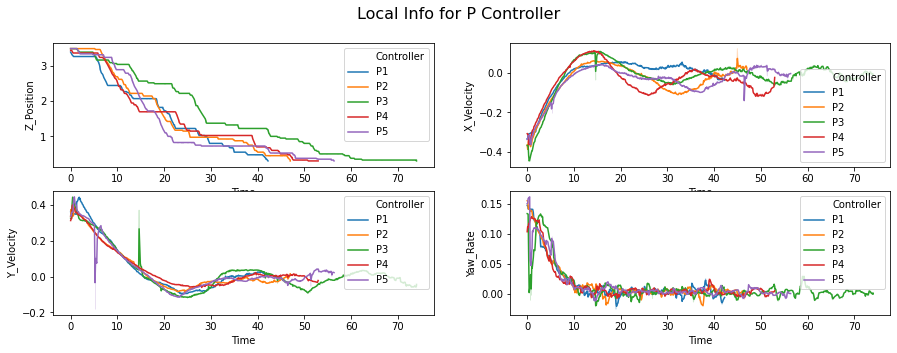

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(15,5))

sns.lineplot(data=local_P, x="Time", y="Z_Position",
             hue="Controller", ax=ax[0][0])
sns.lineplot(data=local_P, x="Time", y="X_Velocity",
             hue="Controller", ax=ax[0][1])
sns.lineplot(data=local_P, x="Time", y="Y_Velocity",
             hue="Controller", ax=ax[1][0])
sns.lineplot(data=local_P, x="Time", y="Yaw_Rate",
             hue="Controller", ax=ax[1][1])

fig.suptitle('Local Info for P Controller', fontsize=16)

In [14]:
local_PD = local_ctrl[
    (local_ctrl.Controller == "PD1") |
    (local_ctrl.Controller == "PD2") |
    (local_ctrl.Controller == "PD3") |
    (local_ctrl.Controller == "PD4") |
    (local_ctrl.Controller == "PD5")
].copy()

Text(0.5, 0.98, 'Local Info for PD Controller')

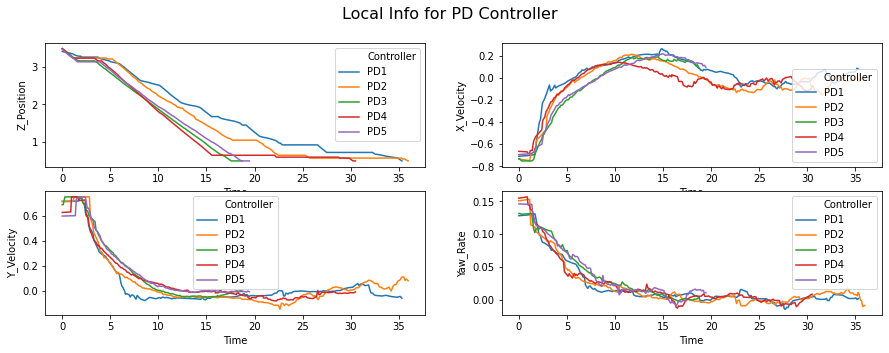

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(15,5))

sns.lineplot(data=local_PD, x="Time", y="Z_Position",
             hue="Controller", ax=ax[0][0])
sns.lineplot(data=local_PD, x="Time", y="X_Velocity",
             hue="Controller", ax=ax[0][1])
sns.lineplot(data=local_PD, x="Time", y="Y_Velocity",
             hue="Controller", ax=ax[1][0])
sns.lineplot(data=local_PD, x="Time", y="Yaw_Rate",
             hue="Controller", ax=ax[1][1])

fig.suptitle('Local Info for PD Controller', fontsize=16)

In [16]:
local_PID = local_ctrl[
    (local_ctrl.Controller == "PID1") |
    (local_ctrl.Controller == "PID2") |
    (local_ctrl.Controller == "PID3") |
    (local_ctrl.Controller == "PID4") |
    (local_ctrl.Controller == "PID5")
].copy()

Text(0.5, 0.98, 'Local Info for PID Controller')

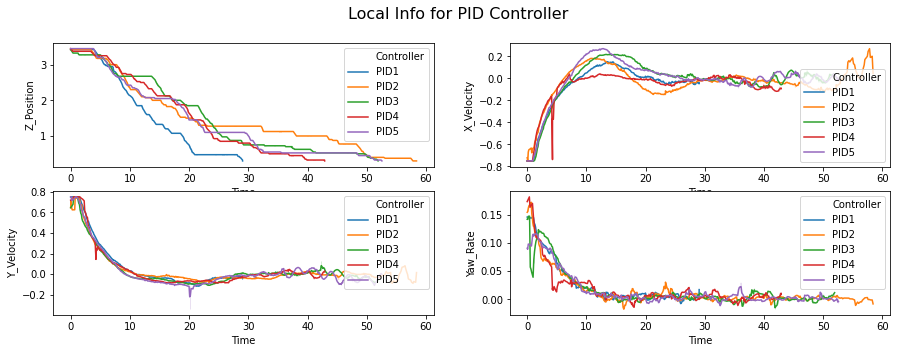

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(15,5))

sns.lineplot(data=local_PID, x="Time", y="Z_Position",
             hue="Controller", ax=ax[0][0])
sns.lineplot(data=local_PID, x="Time", y="X_Velocity",
             hue="Controller", ax=ax[0][1])
sns.lineplot(data=local_PID, x="Time", y="Y_Velocity",
             hue="Controller", ax=ax[1][0])
sns.lineplot(data=local_PID, x="Time", y="Yaw_Rate",
             hue="Controller", ax=ax[1][1])

fig.suptitle('Local Info for PID Controller', fontsize=16)

Reorganize the odometry data to plot the results for each controller.

In [18]:
odom_ctrl = pd.DataFrame(columns=["Time", "Controller", "Z_Position", "X_Velocity", "Y_Velocity", "Yaw_Rate"])

for test in controller_times:
    control = pd.DataFrame(columns=["Time", "Controller", "Z_Position", "X_Velocity", "Y_Velocity", "Yaw_Rate"])
    row_num = odom_data.apply(lambda column: column.dropna().index[-1])[test+"_time"]
    
    control["Time"] = odom_data[test+"_time"][0:row_num+1]
    control["Z_Position"] = odom_data[test+"_pos_Z"][0:row_num+1]
    control["X_Velocity"] = odom_data[test+"_vel_X"][0:row_num+1]
    control["Y_Velocity"] = odom_data[test+"_vel_Y"][0:row_num+1]
    control["Yaw_Rate"] = odom_data[test+"_yaw_rate"][0:row_num+1]
    control["Controller"] = test
    
    odom_ctrl = odom_ctrl.append(control, ignore_index = True)

    del control

odom_ctrl

,Time,Controller,Z_Position,X_Velocity,Y_Velocity,Yaw_Rate
0,-4.547474e-13,P1,3.546532,0.087533,0.057130,0.057130
1,3.199697e-02,P1,3.550179,0.085134,0.030189,0.030189
2,7.199318e-02,P1,3.552724,0.096274,0.075065,0.075065
3,1.039901e-01,P1,3.554897,0.109877,0.070098,0.070098
4,1.359871e-01,P1,3.557152,0.107735,0.046338,0.046338
...,...,...,...,...,...,...
19423,5.245400e+01,PID5,-0.032630,-0.059877,0.018822,-0.000456
19424,5.250200e+01,PID5,-0.033166,-0.058746,0.018021,0.000711
19425,5.250200e+01,PID5,-0.033817,-0.058997,0.017939,0.005824
19426,5.254600e+01,PID5,-0.034662,-0.058008,0.018907,0.001795


In [19]:
odom_P = odom_ctrl[
    (odom_ctrl.Controller == "P1") |
    (odom_ctrl.Controller == "P2") |
    (odom_ctrl.Controller == "P3") |
    (odom_ctrl.Controller == "P4") |
    (odom_ctrl.Controller == "P5")
].copy()

Text(0.5, 0.98, 'Odometry Info for P Controller')

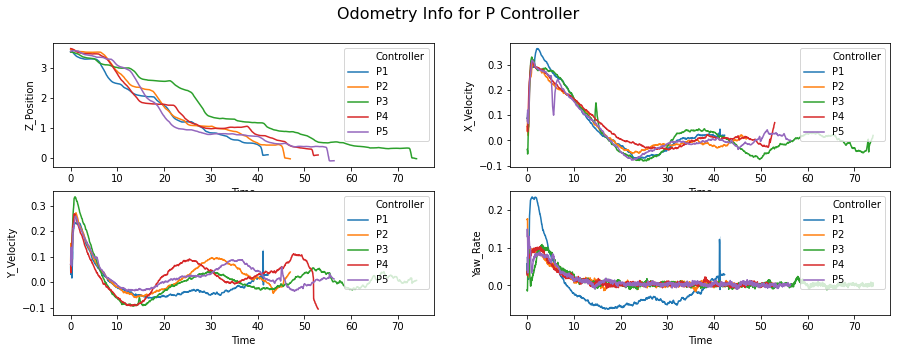

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(15,5))

sns.lineplot(data=odom_P, x="Time", y="Z_Position",
             hue="Controller", ax=ax[0][0])
sns.lineplot(data=odom_P, x="Time", y="X_Velocity",
             hue="Controller", ax=ax[0][1])
sns.lineplot(data=odom_P, x="Time", y="Y_Velocity",
             hue="Controller", ax=ax[1][0])
sns.lineplot(data=odom_P, x="Time", y="Yaw_Rate",
             hue="Controller", ax=ax[1][1])

fig.suptitle('Odometry Info for P Controller', fontsize=16)

In [21]:
odom_PD = odom_ctrl[
    (odom_ctrl.Controller == "PD1") |
    (odom_ctrl.Controller == "PD2") |
    (odom_ctrl.Controller == "PD3") |
    (odom_ctrl.Controller == "PD4") |
    (odom_ctrl.Controller == "PD5")
].copy()

Text(0.5, 0.98, 'Odometry Info for PD Controller')

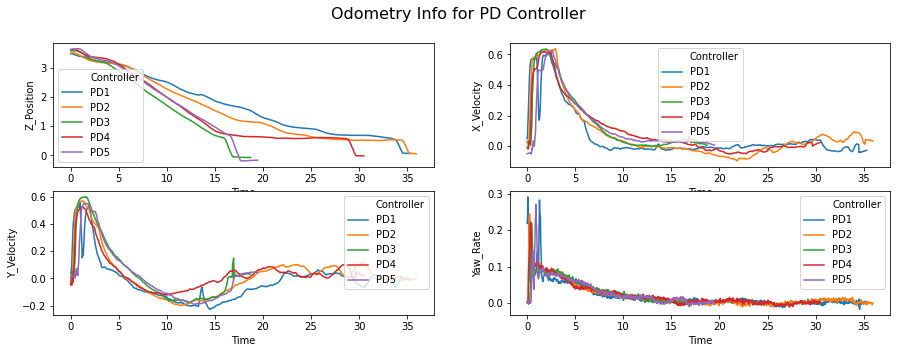

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(15,5))

sns.lineplot(data=odom_PD, x="Time", y="Z_Position",
             hue="Controller", ax=ax[0][0])
sns.lineplot(data=odom_PD, x="Time", y="X_Velocity",
             hue="Controller", ax=ax[0][1])
sns.lineplot(data=odom_PD, x="Time", y="Y_Velocity",
             hue="Controller", ax=ax[1][0])
sns.lineplot(data=odom_PD, x="Time", y="Yaw_Rate",
             hue="Controller", ax=ax[1][1])

fig.suptitle('Odometry Info for PD Controller', fontsize=16)

In [23]:
odom_PID = odom_ctrl[
    (odom_ctrl.Controller == "PID1") |
    (odom_ctrl.Controller == "PID2") |
    (odom_ctrl.Controller == "PID3") |
    (odom_ctrl.Controller == "PID4") |
    (odom_ctrl.Controller == "PID5")
].copy()

Text(0.5, 0.98, 'Odometry Info for PID Controller')

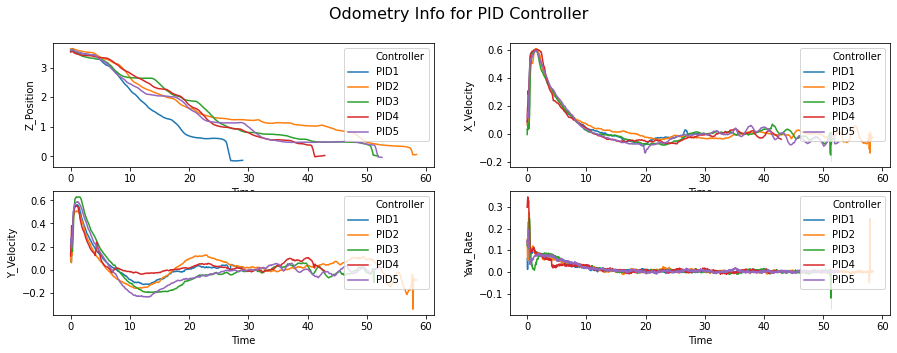

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(15,5))

sns.lineplot(data=odom_PID, x="Time", y="Z_Position",
             hue="Controller", ax=ax[0][0])
sns.lineplot(data=odom_PID, x="Time", y="X_Velocity",
             hue="Controller", ax=ax[0][1])
sns.lineplot(data=odom_PID, x="Time", y="Y_Velocity",
             hue="Controller", ax=ax[1][0])
sns.lineplot(data=odom_PID, x="Time", y="Yaw_Rate",
             hue="Controller", ax=ax[1][1])

fig.suptitle('Odometry Info for PID Controller', fontsize=16)

### Calculate the mean of each controller
Calulate the mean of each controller for controller measures. The mean is calulated using the five tests for each controller. As each tests have different durations, complete the NaN values of the errors with the last value of the test to obtain the mean. The longer duration time will be used to plot the measures.

This process is made for both local and odometry info, for each of the measures of the controller (Z position, x and y velocities, yaw rate).



In [25]:
test_local_df = local_data.copy()

add_last_list = [i for i in test_local_df.columns if 'time' not in i]
for col in add_last_list:
    last_value = test_local_df[col][test_local_df.apply(lambda column: column.dropna().index[-1])[col]]
    test_local_df[col] = test_local_df[col].replace(np.nan, last_value)

test_local_df

,P1_pos_Z,P1_time,P1_vel_X,P1_vel_Y,P1_yaw_rate,P2_pos_Z,P2_time,P2_vel_X,P2_vel_Y,P2_yaw_rate,P3_pos_Z,P3_time,P3_vel_X,P3_vel_Y,P3_yaw_rate,P4_pos_Z,P4_time,P4_vel_X,P4_vel_Y,P4_yaw_rate,P5_pos_Z,P5_time,P5_vel_X,P5_vel_Y,P5_yaw_rate,PD1_pos_Z,PD1_time,PD1_vel_X,PD1_vel_Y,PD1_yaw_rate,PD2_pos_Z,PD2_time,PD2_vel_X,PD2_vel_Y,PD2_yaw_rate,PD3_pos_Z,PD3_time,PD3_vel_X,PD3_vel_Y,PD3_yaw_rate,PD4_pos_Z,PD4_time,PD4_vel_X,PD4_vel_Y,PD4_yaw_rate,PD5_pos_Z,PD5_time,PD5_vel_X,PD5_vel_Y,PD5_yaw_rate,PID1_pos_Z,PID1_time,PID1_vel_X,PID1_vel_Y,PID1_yaw_rate,PID2_pos_Z,PID2_time,PID2_vel_X,PID2_vel_Y,PID2_yaw_rate,PID3_pos_Z,PID3_time,PID3_vel_X,PID3_vel_Y,PID3_yaw_rate,PID4_pos_Z,PID4_time,PID4_vel_X,PID4_vel_Y,PID4_yaw_rate,PID5_pos_Z,PID5_time,PID5_vel_X,PID5_vel_Y,PID5_yaw_rate
0,3.400000,0.000000,-0.334499,0.364091,0.147960,3.500000,0.000000,-0.367179,0.338123,0.155662,3.500000,0.000000,-0.368392,0.326828,0.134077,3.450000,4.547474e-13,-0.308713,0.313951,0.103795,3.500000,0.000000,-0.337689,0.339775,0.150885,3.400000,0.000000,-0.708195,0.714968,0.128122,3.475000,0.000000,-0.733789,0.711334,0.151007,3.475000,-4.547474e-13,-0.730567,0.687596,0.131475,3.475000,0.000000,-0.663846,0.625589,0.154992,3.450000,0.000000,-0.692811,0.597058,0.146263,3.425000,0.000000,-0.750000,0.750000,0.146352,3.425000,0.000000,-0.721001,0.647310,0.154825,3.425000,0.000000,-0.750000,0.644274,0.142372,3.450000,0.000000,-0.750000,0.716920,0.173809,3.450000,0.000000,-0.750000,0.750000,0.090968
1,3.375000,0.113134,-0.334689,0.364092,0.148170,3.500000,0.117153,-0.388658,0.377125,0.154742,3.500000,0.086123,-0.368463,0.327979,0.133662,3.450000,1.034065e-01,-0.311800,0.323950,0.112243,3.500000,0.099482,-0.337170,0.339267,0.151461,3.375000,0.371184,-0.705135,0.715307,0.128689,3.450000,0.096879,-0.734624,0.711028,0.151176,3.450000,9.707026e-02,-0.731404,0.687561,0.131607,3.450000,0.132665,-0.663945,0.625721,0.155176,3.425000,0.112260,-0.692009,0.597306,0.146192,3.425000,0.103090,-0.750000,0.750000,0.146231,3.425000,0.090107,-0.750000,0.707626,0.154908,3.400000,0.095069,-0.750000,0.653015,0.142159,3.425000,0.127641,-0.750000,0.719617,0.176614,3.450000,0.078346,-0.750000,0.750000,0.089136
2,3.349999,0.205318,-0.312593,0.355081,0.142037,3.500000,0.234306,-0.358356,0.347322,0.143792,3.500000,0.196853,-0.368534,0.329130,0.133247,3.450000,2.109493e-01,-0.311561,0.324951,0.110884,3.500000,0.203109,-0.320597,0.359356,0.159297,3.349999,0.915307,-0.702074,0.715645,0.129255,3.425000,0.197970,-0.736044,0.711325,0.151421,3.425000,2.717967e-01,-0.750000,0.750000,0.130460,3.425000,0.213975,-0.664574,0.626385,0.155437,3.400000,0.239162,-0.691207,0.597562,0.146120,3.425000,0.197216,-0.750000,0.750000,0.146109,3.425000,0.090107,-0.750000,0.731919,0.157573,3.375000,0.190138,-0.750000,0.659659,0.147718,3.400000,0.251026,-0.750000,0.722316,0.179420,3.450000,0.189679,-0.750000,0.714895,0.098481
3,3.324999,0.289121,-0.310920,0.354328,0.141932,3.500000,0.234306,-0.343672,0.338213,0.141958,3.500000,0.319887,-0.423453,0.408959,0.057598,3.425000,3.143558e-01,-0.361302,0.395375,0.116952,3.500000,0.281866,-0.318795,0.360496,0.160267,3.324999,1.164169,-0.699014,0.715983,0.129821,3.400000,0.320122,-0.737464,0.711623,0.151666,3.400000,3.931346e-01,-0.750000,0.750000,0.130594,3.400000,0.350919,-0.665203,0.627048,0.155698,3.375000,0.341660,-0.690405,0.597817,0.146047,3.425000,0.295823,-0.750000,0.750000,0.145207,3.425000,0.188406,-0.686675,0.654827,0.157114,3.349999,0.293473,-0.750000,0.668822,0.147811,3.375000,0.365903,-0.750000,0.725017,0.182227,3.450000,0.461828,-0.750000,0.724366,0.097238
4,3.299999,0.477678,-0.309247,0.353575,0.141827,3.500000,0.347275,-0.343021,0.339008,0.141431,3.500000,0.422415,-0.447666,0.444811,0.001677,3.400000,4.260348e-01,-0.365303,0.402265,0.115998,3.500000,0.418654,-0.316993,0.361635,0.161238,3.299999,1.341325,-0.695954,0.716322,0.130387,3.375000,0.438061,-0.738884,0.711921,0.151911,3.375000,5.144724e-01,-0.750000,0.750000,0.130728,3.375000,0.483584,-0.665832,0.627712,0.1

In [26]:
test_odom_df = odom_data.copy()

add_last_list = [i for i in test_odom_df.columns if 'time' not in i]
for col in add_last_list:
    last_value = test_odom_df[col][test_odom_df.apply(lambda column: column.dropna().index[-1])[col]]
    test_odom_df[col] = test_odom_df[col].replace(np.nan, last_value)

test_odom_df

,P1_pos_Z,P1_time,P1_vel_X,P1_vel_Y,P1_yaw_rate,P2_pos_Z,P2_time,P2_vel_X,P2_vel_Y,P2_yaw_rate,P3_pos_Z,P3_time,P3_vel_X,P3_vel_Y,P3_yaw_rate,P4_pos_Z,P4_time,P4_vel_X,P4_vel_Y,P4_yaw_rate,P5_pos_Z,P5_time,P5_vel_X,P5_vel_Y,P5_yaw_rate,PD1_pos_Z,PD1_time,PD1_vel_X,PD1_vel_Y,PD1_yaw_rate,PD2_pos_Z,PD2_time,PD2_vel_X,PD2_vel_Y,PD2_yaw_rate,PD3_pos_Z,PD3_time,PD3_vel_X,PD3_vel_Y,PD3_yaw_rate,PD4_pos_Z,PD4_time,PD4_vel_X,PD4_vel_Y,PD4_yaw_rate,PD5_pos_Z,PD5_time,PD5_vel_X,PD5_vel_Y,PD5_yaw_rate,PID1_pos_Z,PID1_time,PID1_vel_X,PID1_vel_Y,PID1_yaw_rate,PID2_pos_Z,PID2_time,PID2_vel_X,PID2_vel_Y,PID2_yaw_rate,PID3_pos_Z,PID3_time,PID3_vel_X,PID3_vel_Y,PID3_yaw_rate,PID4_pos_Z,PID4_time,PID4_vel_X,PID4_vel_Y,PID4_yaw_rate,PID5_pos_Z,PID5_time,PID5_vel_X,PID5_vel_Y,PID5_yaw_rate
0,3.546532,-4.547474e-13,0.087533,0.057130,0.057130,3.611732,0.000000,0.038131,0.083676,0.173657,3.532215,0.000000,-0.036088,0.064345,-0.011976,3.651750,0.000000,0.055016,0.069867,0.036286,3.557235,0.000,0.077147,0.070669,0.129188,3.480363,0.000000,0.048953,-0.048550,0.218953,3.505886,0.000000,0.021686,-0.019650,0.001515,3.581409,0.000000,0.030815,0.043243,0.000606,3.621951,0.000000,-0.007947,-0.037535,0.001709,3.626810,0.000000,-0.049508,0.009978,0.004117,3.545837,0.000000,0.093959,0.134657,0.061215,3.631645,-4.547474e-13,0.070717,0.099086,0.148718,3.601581,0.000000,-0.002203,0.199507,0.124067,3.529986,4.547474e-13,0.087340,0.119739,0.298008,3.595464,4.547474e-13,0.116679,0.231604,0.135301
1,3.550179,3.199697e-02,0.085134,0.030189,0.030189,3.614910,0.032001,0.058414,0.122043,0.173271,3.531711,0.036004,-0.038259,0.068826,-0.015078,3.651188,0.036003,0.051691,0.073032,0.026277,3.560983,0.032,0.082738,0.086755,0.148743,3.481990,0.043998,0.080363,-0.011450,0.240146,3.505620,0.036004,0.021548,-0.018264,-0.000128,3.580386,0.035992,0.030818,0.044279,0.001736,3.622511,0.032004,-0.007999,-0.035052,0.001702,3.627774,0.031993,-0.048985,0.010088,0.000253,3.546223,0.031996,0.088728,0.116084,0.051814,3.632230,3.199890e-02,0.077031,0.119726,0.095245,3.603301,0.027998,0.036199,0.247994,0.122142,3.533722,3.200000e-02,0.150728,0.190218,0.312324,3.595272,3.600137e-02,0.123303,0.225281,0.147485
2,3.552724,7.199318e-02,0.096274,0.075065,0.075065,3.618310,0.068003,0.092093,0.152777,0.176450,3.531423,0.068007,-0.041668,0.059248,-0.007646,3.651789,0.068005,0.035862,0.036692,0.035774,3.565528,0.064,0.109599,0.137096,0.142784,3.482758,0.063996,0.134124,0.054084,0.291484,3.505354,0.068008,0.022597,-0.017506,0.002334,3.579629,0.067985,0.029433,0.043580,0.000802,3.622569,0.068009,-0.008667,-0.033862,0.001761,3.628173,0.063987,-0.047905,0.009907,-0.000183,3.546161,0.063991,0.069606,0.109920,0.011820,3.631538,6.399781e-02,0.076590,0.105482,0.057262,3.605116,0.051996,0.029093,0.224915,0.119503,3.536465,6.800000e-02,0.194273,0.249330,0.325879,3.597123,6.800259e-02,0.153186,0.274884,0.126009
3,3.554897,1.039901e-01,0.109877,0.070098,0.070098,3.620390,0.100004,0.093058,0.123126,0.125414,3.531541,0.096010,-0.054297,0.040357,0.011638,3.651682,0.096007,0.034154,0.046542,0.072198,3.569589,0.100,0.120279,0.108964,0.123836,3.482182,0.103994,0.194242,0.090688,0.254281,3.505220,0.100011,0.010496,-0.032915,0.012309,3.579027,0.099979,0.028695,0.043597,0.002557,3.623113,0.100013,-0.018007,-0.049665,0.013884,3.628148,0.099979,-0.046783,0.010503,0.004965,3.547048,0.099986,0.036684,0.064710,0.055237,3.631145,9.599671e-02,0.057434,0.070668,0.052970,3.607977,0.095993,0.036114,0.229495,0.154805,3.538720,1.000000e-01,0.198186,0.258824,0.346104,3.599672,1.000038e-01,0.149193,0.250531,0.112623
4,3.557152,1.359871e-01,0.107735,0.046338,0.046338,3.621241,0.132006,0.081238,0.138705,0.097320,3.532696,0.136015,-0.044855,0.065782,0.085642,3.650605,0.136010,0.052707,0.078184,0.086884,3.572737,0.132,0.112847,0.100703,0.069196,3.479991,0.135992,0.259859,0.157647,0.232072,3.506691,0.136015,-0.006954,-0.047111,0.103641,3.577990,0.135971,0.028545,0.044283,-0.003318,3.625125,0.132017,-0.013793,-0.037935,0.077766,3.628206,0.1319

In [27]:
time_columns = [i for i in local_data.columns if 'time' in i]
column_pos = local_data[time_columns].apply(lambda column: column.dropna().index[-1])

time_last_row = dict(zip(time_columns, column_pos))

print(time_last_row)

{'P1_time': 565, 'P2_time': 558, 'P3_time': 864, 'P4_time': 603, 'P5_time': 701, 'PD1_time': 189, 'PD2_time': 244, 'PD3_time': 142, 'PD4_time': 251, 'PD5_time': 144, 'PID1_time': 328, 'PID2_time': 644, 'PID3_time': 517, 'PID4_time': 461, 'PID5_time': 587}


In [28]:
time_columns = [i for i in odom_data.columns if 'time' in i]
column_pos = odom_data[time_columns].apply(lambda column: column.dropna().index[-1])

time_last_row = dict(zip(time_columns, column_pos))

print(time_last_row)

{'P1_time': 1266, 'P2_time': 1409, 'P3_time': 2219, 'P4_time': 1588, 'P5_time': 1690, 'PD1_time': 1059, 'PD2_time': 1079, 'PD3_time': 561, 'PD4_time': 914, 'PD5_time': 584, 'PID1_time': 871, 'PID2_time': 1752, 'PID3_time': 1557, 'PID4_time': 1287, 'PID5_time': 1577}


A new dataset is created with the mean of the measures for the three controllers (for odometry data). As mentioned above the longest time of the controllers will be used  to plot the measures of each controller:

Odometry info:

 - For the P controller: from row 0 to row 2219 (the longest duration test was P3).
 - For the PD controller: from row 0 to row 638 (the longest duration test was PD2).
 - For the PID controller: from row 0 to row 1752 (the longest duration test was PID2).
 
In this analysis the local info won't be used, but if needed the longest times of Local info are the following:

 - For the P controller: from row 0 to row 864 (the longest duration test was P3).
 - For the PD controller: from row 0 to row 1653 (the longest duration test was PD2).
 - For the PID controller: from row 0 to row 644 (the longest duration test was PID2).

Create a new dataframe to save the mean data of the controllers, by differentiating each controller with column _Controller_.

In [29]:
mean_df = pd.DataFrame(columns = ["Time", "Controller", "Z_Pos_Odom",
                        "Vel_X_Odom", "Vel_Y_Odom", "Yaw_Rate_Odom"])

In [30]:
temp_df = pd.DataFrame()
temp_df["Time"] = test_odom_df.loc[0:2219, "P3_time"]
temp_df["Z_Pos_Odom"] = test_odom_df.loc[0:2219, ["P1_pos_Z", "P2_pos_Z", "P3_pos_Z", "P4_pos_Z", "P5_pos_Z"]].mean(axis=1)
temp_df["Vel_X_Odom"] = test_odom_df.loc[0:2219, ["P1_vel_X", "P2_vel_X", "P3_vel_X", "P4_vel_X", "P5_vel_X"]].mean(axis=1)
temp_df["Vel_Y_Odom"] = test_odom_df.loc[0:2219, ["P1_vel_Y", "P2_vel_Y", "P3_vel_Y", "P4_vel_Y", "P5_vel_Y"]].mean(axis=1)
temp_df["Yaw_Rate_Odom"] = test_odom_df.loc[0:2219, ["P1_yaw_rate", "P2_yaw_rate", "P3_yaw_rate", "P4_yaw_rate", "P5_yaw_rate"]].mean(axis=1)
temp_df["Controller"] = "P"

mean_df = mean_df.append(temp_df, ignore_index=True) 
temp_df.drop(temp_df.index, inplace=True)


temp_df["Time"] = test_odom_df.loc[0:1653, "PD3_time"]
temp_df["Z_Pos_Odom"] = test_odom_df.loc[0:1653, ["PD1_pos_Z", "PD2_pos_Z", "PD3_pos_Z", "PD4_pos_Z", "PD5_pos_Z"]].mean(axis=1)
temp_df["Vel_X_Odom"] = test_odom_df.loc[0:1653, ["PD1_vel_X", "PD2_vel_X", "PD3_vel_X", "PD4_vel_X", "PD5_vel_X"]].mean(axis=1)
temp_df["Vel_Y_Odom"] = test_odom_df.loc[0:1653, ["PD1_vel_Y", "PD2_vel_Y", "PD3_vel_Y", "PD4_vel_Y", "PD5_vel_Y"]].mean(axis=1)
temp_df["Yaw_Rate_Odom"] = test_odom_df.loc[0:1653, ["PD1_yaw_rate", "PD2_yaw_rate", "PD3_yaw_rate", "PD4_yaw_rate", "PD5_yaw_rate"]].mean(axis=1)
temp_df["Controller"] = "PD"

mean_df = mean_df.append(temp_df, ignore_index=True) 
temp_df.drop(temp_df.index, inplace=True)


temp_df["Time"] = test_odom_df.loc[0:1752, "PID3_time"]
temp_df["Z_Pos_Odom"] = test_odom_df.loc[0:1752, ["PID1_pos_Z", "PID2_pos_Z", "PID3_pos_Z", "PID4_pos_Z", "PID5_pos_Z"]].mean(axis=1)
temp_df["Vel_X_Odom"] = test_odom_df.loc[0:1752, ["PID1_vel_X", "PID2_vel_X", "PID3_vel_X", "PID4_vel_X", "PID5_vel_X"]].mean(axis=1)
temp_df["Vel_Y_Odom"] = test_odom_df.loc[0:1752, ["PID1_vel_Y", "PID2_vel_Y", "PID3_vel_Y", "PID4_vel_Y", "PID5_vel_Y"]].mean(axis=1)
temp_df["Yaw_Rate_Odom"] = test_odom_df.loc[0:1752, ["PID1_yaw_rate", "PID2_yaw_rate", "PID3_yaw_rate", "PID4_yaw_rate", "PID5_yaw_rate"]].mean(axis=1)
temp_df["Controller"] = "PID"

mean_df = mean_df.append(temp_df, ignore_index=True) 
del temp_df

In [31]:
mean_df

,Time,Controller,Z_Pos_Odom,Vel_X_Odom,Vel_Y_Odom,Yaw_Rate_Odom
0,0.000000,P,3.579893,0.044348,0.069137,0.076857
1,0.036004,P,3.581794,0.047944,0.076169,0.072680
2,0.068007,P,3.583955,0.058432,0.092176,0.084485
3,0.096010,P,3.585620,0.060614,0.077817,0.080637
4,0.136015,P,3.586886,0.061934,0.085942,0.077076
...,...,...,...,...,...,...
5622,NaN,PID,-0.014447,-0.028897,-0.009726,0.003763
5623,NaN,PID,-0.014199,-0.029010,-0.009615,0.003982
5624,NaN,PID,-0.013966,-0.029202,-0.009643,0.003452
5625,NaN,PID,-0.013682,-0.029376,-0.009729,0.003272


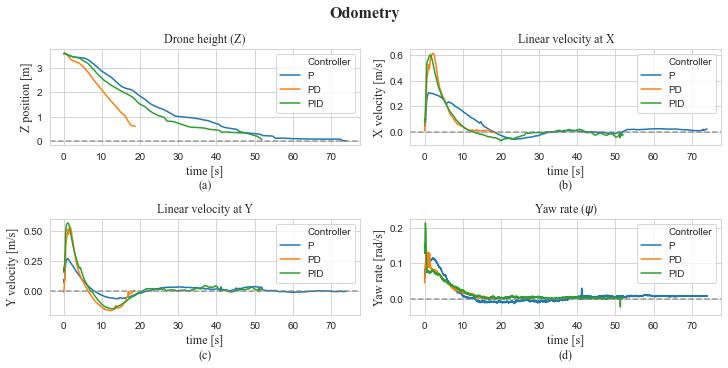

In [32]:
timesfont = {'fontname':'Times New Roman'}

sns.set_style('whitegrid')

fig = plt.figure(constrained_layout=True, figsize=(10,5))

gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

pos_z = sns.lineplot(data=mean_df, x="Time", y="Z_Pos_Odom",
             hue="Controller", ax=ax1)
vel_x = sns.lineplot(data=mean_df, x="Time", y="Vel_X_Odom",
             hue="Controller", ax=ax2)
vel_y = sns.lineplot(data=mean_df, x="Time", y="Vel_Y_Odom",
             hue="Controller", ax=ax3)
yaw_rate = sns.lineplot(data=mean_df, x="Time", y="Yaw_Rate_Odom",
             hue="Controller", ax=ax4)

pos_z.axhline(y=0, linewidth=1.5, color='grey', ls='--', alpha=0.75)
vel_x.axhline(y=0, linewidth=1.5, color='grey', ls='--', alpha=0.75)
vel_y.axhline(y=0, linewidth=1.5, color='grey', ls='--', alpha=0.75)
yaw_rate.axhline(y=0, linewidth=1.5, color='grey', ls='--', alpha=0.75)


pos_z.set_title("Drone height (Z)", fontsize=12, **timesfont)
vel_x.set_title("Linear velocity at X", fontsize=12, **timesfont)
vel_y.set_title("Linear velocity at Y", fontsize=12, **timesfont)
yaw_rate.set_title(r"Yaw rate ($\psi$)", fontsize=12, **timesfont)

pos_z.set_xlabel("time [s]\n(a)", fontsize=12, **timesfont)
vel_x.set_xlabel("time [s]\n(b)", fontsize=12, **timesfont)
vel_y.set_xlabel("time [s]\n(c)", fontsize=12, **timesfont)
yaw_rate.set_xlabel("time [s]\n(d)", fontsize=12, **timesfont)

pos_z.set_ylabel("Z position [m]", fontsize=12, **timesfont)
vel_x.set_ylabel("X velocity [m/s]", fontsize=12, **timesfont)
vel_y.set_ylabel("Y velocity [m/s]", fontsize=12, **timesfont)
yaw_rate.set_ylabel("Yaw rate [rad/s]", fontsize=12, **timesfont)


fig.suptitle('Odometry', fontsize=16, fontweight='bold', **timesfont)

plt.show()